# Projeto de Regressão Logística


Neste projeto estaremos trabalhando com um conjunto de dados falso de publicidade, indicando se um usuário de internet específico clicou ou não em uma propaganda. Vamos tentar criar um modelo que preveja se clicará ou não em um anúncio baseado nos recursos desse usuário.

Este conjunto de dados contém os seguintes recursos:

* 'Daily Time Spent on Site': tempo no site em minutos.
* 'Age': idade do consumidor.
* 'Area Income': Média da renda do consumidor na região.
* 'Daily Internet Usage': Média em minutos por di que o consumidor está na internet.
* 'Linha do tópico do anúncio': Título do anúncio.
* 'City': Cidade do consumidor.
* 'Male': Se o consumidor era ou não masculino.
* 'Country': País do consumidor.
* 'Timestamp': hora em que o consumidor clicou no anúncio ou janela fechada.
* 'Clicked on Ad'': 0 ou 1 indicam se clicou ou não no anúncio.

## Importar bibliotecas

** Importe algumas bibliotecas que você acha que você precisará **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obter dados
** Leia o arquivo advertising.csv e grave-o em um DataFrame chamado ad_data. **

In [184]:
advertising = pd.read_csv('advertising.csv')

In [185]:
country_continent = pd.read_excel(r'C:\Users\ferraoc\Desktop\DataScience\country_continent.xlsx')

** Verifique o cabeçalho do ad_data **

In [186]:
advertising = pd.merge(advertising, country_continent, on = 'Country', how = 'left')

** Use info() e describe() em ad_data **

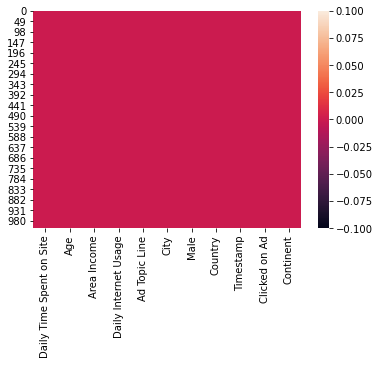

In [86]:
sns.heatmap(advertising.isnull())

In [45]:
advertising['Continent'].value_counts()

Europe             235
Africa             222
Asia               200
Oceania            117
Caribbe            104
South America       62
Central America     31
North America       26
Antarctica          13
Lao                  4
Name: Continent, dtype: int64

In [43]:
set(advertising[advertising['Continent'].isnull()]['Country'])

set()

In [26]:
len(set(advertising['Country']))

237

## Análise de dados exploratória

Vamos usar Seaborn para explorar os dados!

Tente recriar os gráficos abaixo.

** Crie um histograma de "Age" **

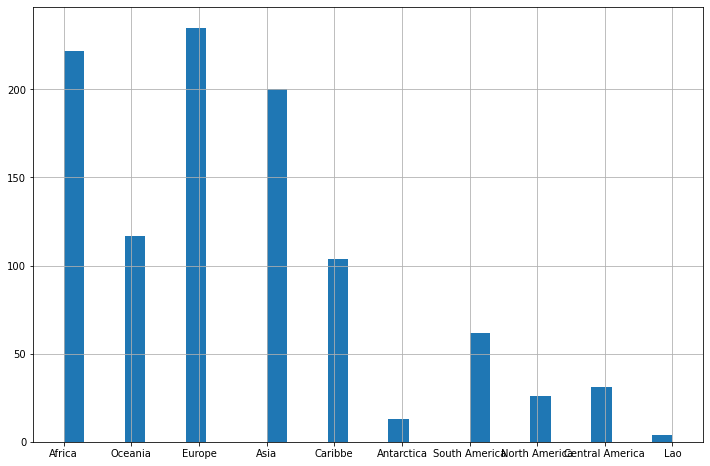

In [54]:
advertising['Continent'].hist(bins=30, figsize = (12, 8))

** Crie um joinplot mostrando "Area Income" versus "Age" **

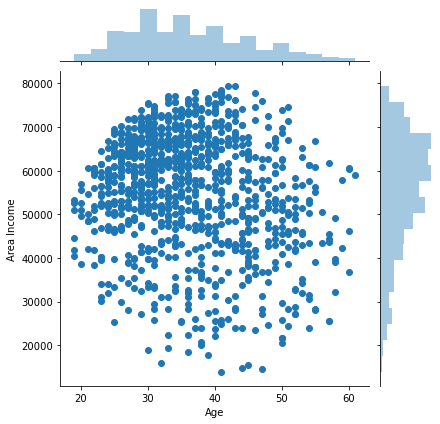

In [56]:
sns.jointplot(y = 'Area Income', x = 'Age', data = advertising)

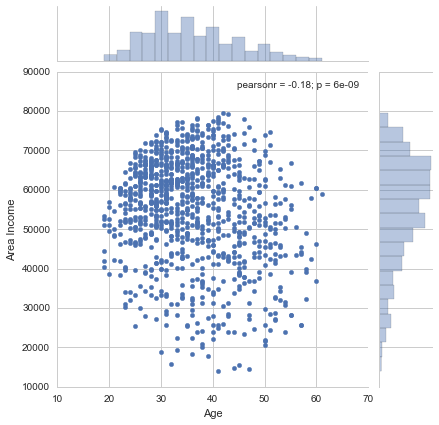

** Crie um jointplot que mostre as distribuições KDE do "Daily Time spent" no site vs "Age". **

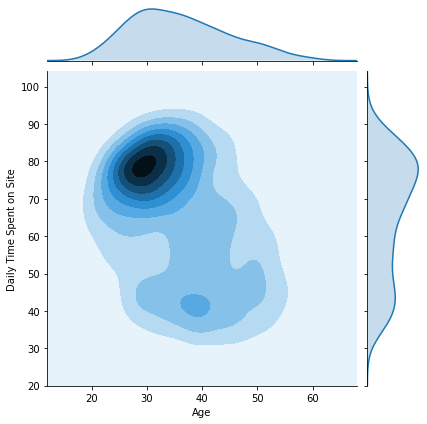

In [63]:
sns.jointplot(kind = 'kde', x = 'Age', y = 'Daily Time Spent on Site', data = advertising)

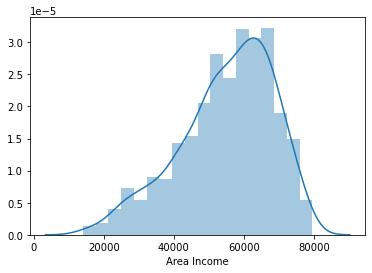

In [71]:
sns.distplot(advertising['Area Income'])

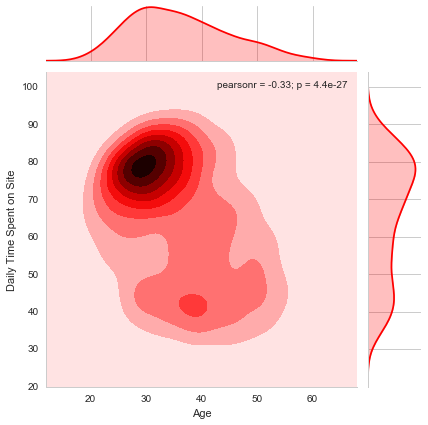

** Crie um jointplot do 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

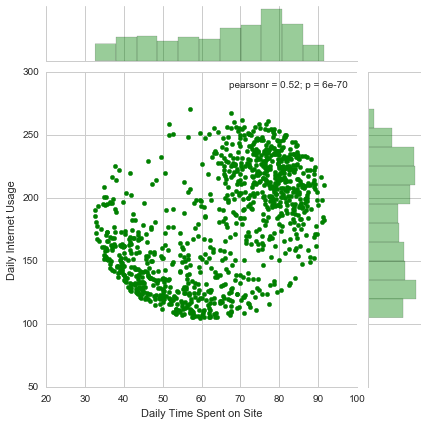

** Finalmente, crie um parplot com o matiz definido pelo recurso de coluna 'Clicked on Ad'. **

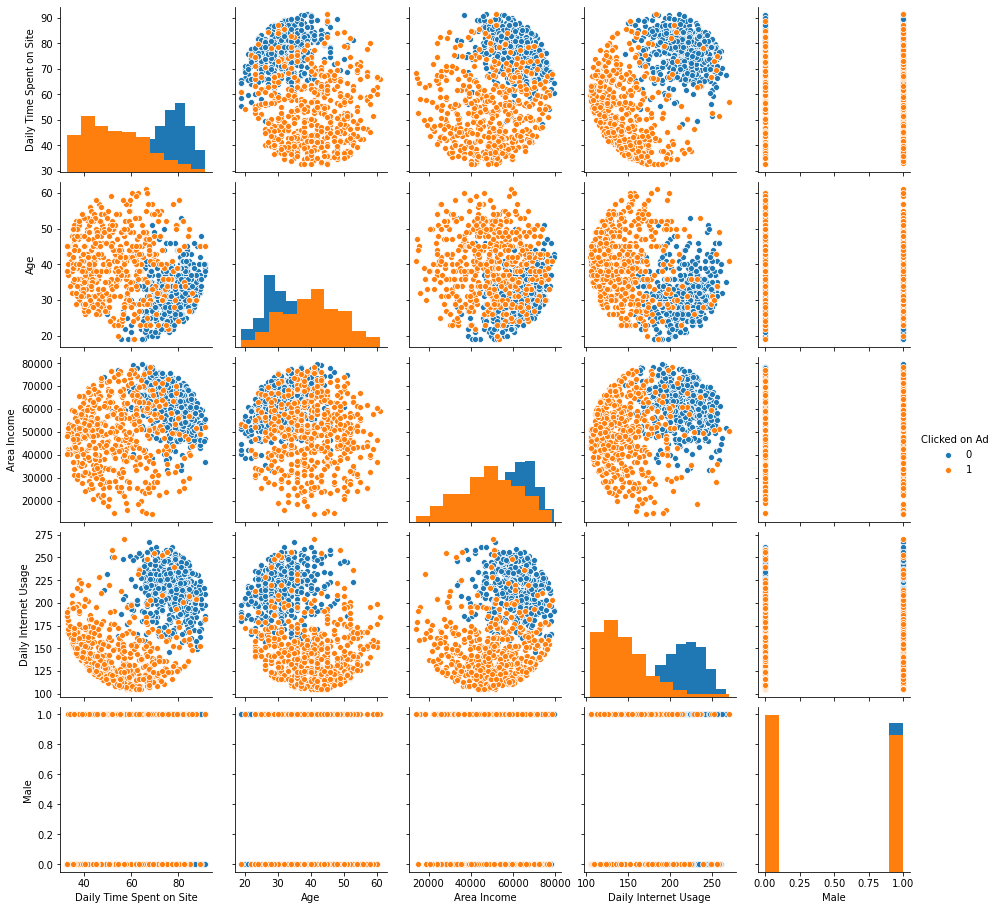

In [68]:
sns.pairplot(data=advertising, hue = 'Clicked on Ad', diag_kind="hist")

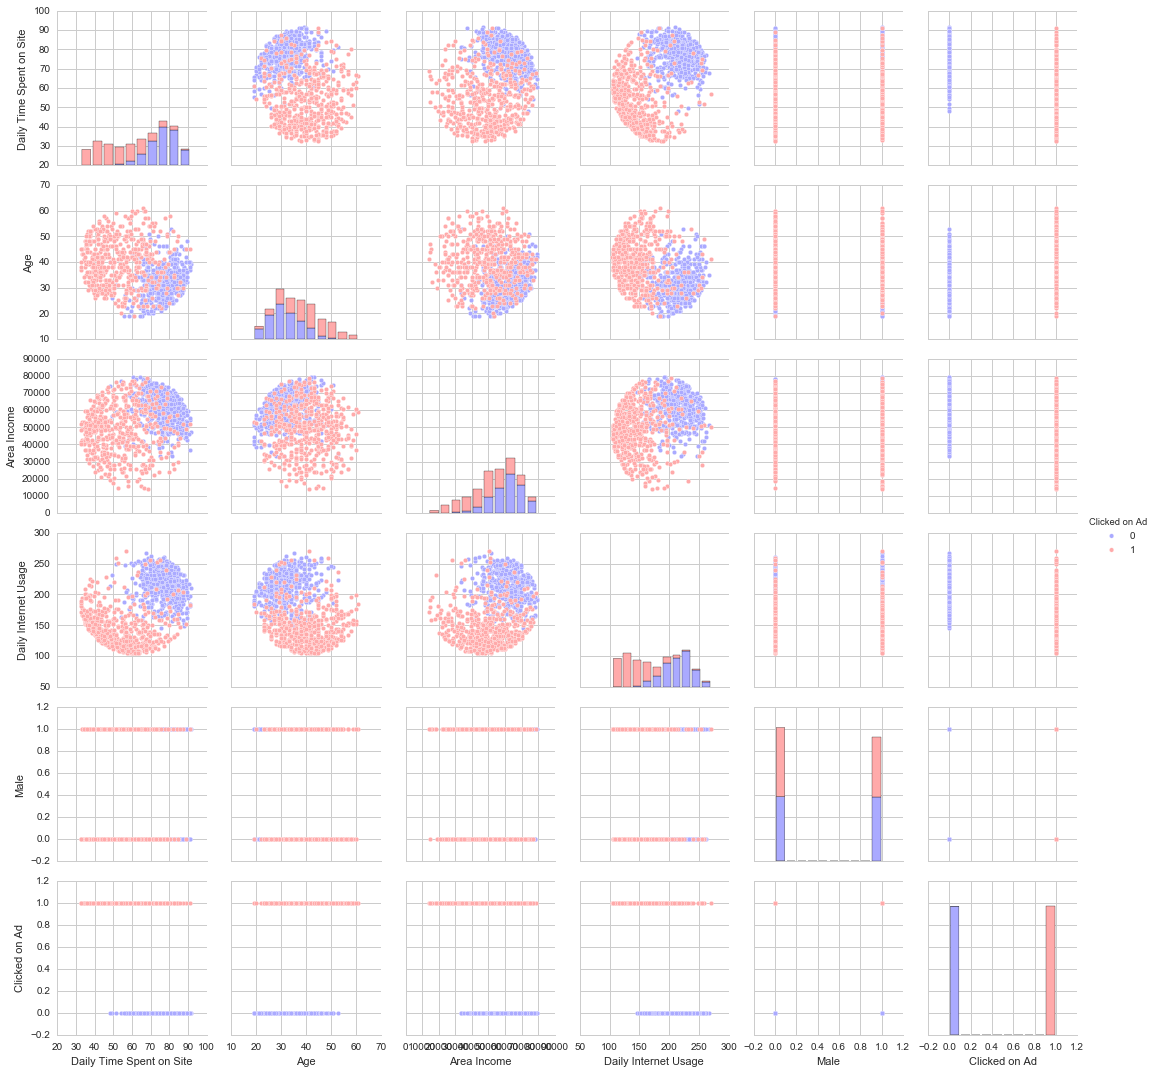

In [76]:
advertising.corr(method='pearson') - advertising.corr(method='spearman') 

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,0.000000,-0.014227,0.027589,0.003895,-2.470797e-03,-3.449860e-03
Age,-0.014227,0.000000,-0.044509,0.002979,1.899266e-03,5.880384e-03
Area Income,0.027589,-0.044509,0.000000,-0.001080,1.564970e-02,-8.882856e-03
Daily Internet Usage,0.003895,0.002979,-0.001080,0.000000,-1.771060e-04,-1.009538e-02
Male,-0.002471,0.001899,0.015650,-0.000177,0.000000e+00,-9.506285e-16
Clicked on Ad,-0.003450,0.005880,-0.008883,-0.010095,-9.506285e-16,0.000000e+00



# Regressão Logística

Agora é hora de quebrar nossos dados em treino e teste e fitar nosso modelo.

Você terá a liberdade aqui para escolher colunas em que deseja treinar!

** Divida os dados em conjunto de treinamento e conjunto de testes usando train_test_split **

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [93]:
Continent_d = pd.get_dummies(advertising['Continent'])


In [99]:
list_w = []
for row in advertising['Ad Topic Line'].str.split(' '):
    for word in row:
       list_w.append(word) 

In [110]:
print('org', len(set([x.lower() for x in list_w])))
print('n', len(set(advertising['Ad Topic Line'])))

org 315
n 1000


In [114]:
sorted(set([x.lower() for x in list_w]))


['24/7',
 '24hour',
 '3rdgeneration',
 '4thgeneration',
 '5thgeneration',
 '6thgeneration',
 'ability',
 'access',
 'actuating',
 'adapter',
 'adaptive',
 'administration',
 'advanced',
 'algorithm',
 'alliance',
 'ameliorated',
 'analyzer',
 'analyzing',
 'application',
 'approach',
 'architecture',
 'archive',
 'area',
 'array',
 'artificial',
 'assimilated',
 'asymmetric',
 'asynchronous',
 'attitude',
 'attitude-oriented',
 'automated',
 'background',
 'balanced',
 'bandwidth-monitored',
 'benchmark',
 'bi-directional',
 'bifurcated',
 'bottom-line',
 'budgetary',
 'business-focused',
 'capability',
 'capacity',
 'centralized',
 'challenge',
 'circuit',
 'clear-thinking',
 'client-driven',
 'client-server',
 'cloned',
 'coherent',
 'cohesive',
 'collaboration',
 'compatible',
 'complexity',
 'composite',
 'concept',
 'configurable',
 'conglomeration',
 'content-based',
 'context-sensitive',
 'contextually-based',
 'contingency',
 'core',
 'cross-group',
 'cross-platform',
 'custome

In [119]:
sorted(advertising['Ad Topic Line'])
list_k = []
for row in advertising['Ad Topic Line'].str.split(' '):
    list_k.append(row[0]) 

In [122]:
print(sorted(set(list_k)))



['Adaptive', 'Advanced', 'Ameliorated', 'Assimilated', 'Automated', 'Balanced', 'Business-focused', 'Centralized', 'Cloned', 'Compatible', 'Configurable', 'Cross-group', 'Cross-platform', 'Customer-focused', 'Customizable', 'De-engineered', 'Decentralized', 'Devolved', 'Digitized', 'Distributed', 'Diverse', 'Down-sized', 'Enhanced', 'Enterprise-wide', 'Ergonomic', 'Exclusive', 'Expanded', 'Extended', 'Face-to-face', 'Focused', 'Front-line', 'Fully-configurable', 'Function-based', 'Fundamental', 'Future-proofed', 'Grass-roots', 'Horizontal', 'Implemented', 'Innovative', 'Integrated', 'Intuitive', 'Inverse', 'Managed', 'Mandatory', 'Monitored', 'Multi-channeled', 'Multi-lateral', 'Multi-layered', 'Multi-tiered', 'Networked', 'Object-based', 'Open-architected', 'Open-source', 'Operative', 'Optimized', 'Optional', 'Organic', 'Organized', 'Persevering', 'Persistent', 'Phased', 'Polarized', 'Pre-emptive', 'Proactive', 'Profit-focused', 'Profound', 'Programmable', 'Progressive', 'Public-key',

In [144]:
final_report = pd.DataFrame()
for row in advertising['Ad Topic Line']:
    df = pd.DataFrame()
    df['info'] = [row]
    for word in set(list_k):
        if word in row:
            df[word] = [1]
        else:
            df[word] = [0]
    final_report = pd.concat([df, final_report], ignore_index=True)
print(final_report)

                                       info  Grass-roots  Object-based  \
0           Virtual 5thgeneration emulation            0             0   
1      Proactive bandwidth-monitored policy            0             0   
2              Expanded intangible solution            0             0   
3           Grass-roots cohesive monitoring            1             0   
4             Fundamental modular algorithm            0             0   
...                                     ...          ...           ...   
1009          Robust logistical utilization            0             0   
1010  Triple-buffered reciprocal time-frame            0             0   
1011       Organic bottom-line service-desk            0             0   
1012     Monitored national standardization            0             0   
1013     Cloned 5thgeneration orchestration            0             0   

      Digitized  Managed  Centralized  Distributed  Streamlined  Intuitive  \
0             0        0         

In [147]:
final_report.rename(columns={'info':'Ad Topic Line'}, inplace=True)

In [198]:
# pd.merge(advertising, final_report, on = 'Ad Topic Line', how = 'left')
advertising['Timestamp'] = pd.to_datetime(advertising['Timestamp'])

<ipython-input-198-2dfb76ac89e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  advertising['Timestamp'] = pd.to_datetime(advertising['Timestamp'])


In [194]:
advertising = advertising.drop_duplicates()

In [209]:
final_report = final_report.drop_duplicates()

In [199]:
hour = []
for x in advertising['Timestamp'].dt.hour:
    if (x > 4) and (x <= 8):
        hour.append('Early Morning')
    elif (x > 8) and (x <= 12 ):
        hour.append('Morning')
    elif (x > 12) and (x <= 16):
        hour.append('Noon')
    elif (x > 16) and (x <= 20) :
        hour.append('Eve')
    elif (x > 20) and (x <= 24):
        hour.append('Night')
    elif (x <= 4):
        hour.append('Late Night')


In [200]:
advertising['TimeDay'] = hour

<ipython-input-200-9e18d6926e4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  advertising['TimeDay'] = hour


In [202]:
len(advertising['TimeDay'])

1000

In [203]:
TimeDay = pd.get_dummies(advertising['TimeDay'])
Continent = pd.get_dummies(advertising['Continent'])

In [205]:
len(Continent)

1000

In [221]:
result = pd.concat([advertising, TimeDay, Continent], axis = 1)
# pd.merge(advertising, final_report, on = 'Ad Topic Line', how = 'left')

In [222]:
result
# result.drop(columns = ['City', 'Country', 'Timestamp', 'Continent'], inplace = True)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,...,Noon,Africa,Antarctica,Asia,Caribbe,Central America,Europe,North America,Oceania,South America
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,...,0,1,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,...,0,0,0,0,0,0,0,0,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,...,0,0,0,0,0,0,1,0,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,...,0,0,0,0,0,0,1,0,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,...,0,0,0,1,0,0,0,0,0,0
1010,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,...,0,0,0,0,0,0,1,0,0,0
1011,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,...,0,0,0,1,0,0,0,0,0,0
1012,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,...,0,0,0,0,0,1,0,0,0,0


In [224]:
result = pd.merge(result, final_report, on = 'Ad Topic Line', how = 'left')

In [225]:
result.drop(columns = ['TimeDay', 'Ad Topic Line', 'City', 'Country', 'Continent', 'Timestamp'], inplace = True)

In [245]:
for c in result.columns:
    print("\"" + c + "\"," )
y = result['Clicked on Ad']
x = result.drop(columns = ['Clicked on Ad'])

"Daily Time Spent on Site",
"Age",
"Area Income",
"Daily Internet Usage",
"Male",
"Clicked on Ad",
"Early Morning",
"Eve",
"Late Night",
"Morning",
"Night",
"Noon",
"Africa",
"Antarctica",
"Asia",
"Caribbe",
"Central America",
"Europe",
"North America",
"Oceania",
"South America",
"Grass-roots",
"Object-based",
"Digitized",
"Managed",
"Centralized",
"Distributed",
"Streamlined",
"Intuitive",
"Operative",
"Robust",
"Enhanced",
"Business-focused",
"Re-engineered",
"Polarized",
"Innovative",
"Horizontal",
"Secured",
"Assimilated",
"Configurable",
"Public-key",
"Ameliorated",
"Synergized",
"Mandatory",
"Inverse",
"Integrated",
"Cross-platform",
"Persistent",
"Profound",
"Automated",
"Fundamental",
"Focused",
"Fully-configurable",
"Upgradable",
"Phased",
"Reduced",
"Balanced",
"Open-architected",
"Multi-lateral",
"Universal",
"Realigned",
"Synergistic",
"Diverse",
"Ergonomic",
"Monitored",
"Reverse-engineered",
"Customizable",
"Cloned",
"Cross-group",
"Reactive",
"Vision-oriented",
"Virtual

In [246]:
x_train, x_test, y_train,y_test =train_test_split(x, y, test_size=0.3,random_state=101)

In [247]:
lr = LogisticRegression()

In [248]:
lr.fit(x_train, y_train)

LogisticRegression()

In [250]:
predictions = lr.predict(x_test)

In [251]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import 

In [252]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



** Treine e ajuste um modelo de regressão logística no conjunto de treinamento. **

In [253]:
from sklearn.metrics import confusion_matrix

In [254]:
print(confusion_matrix(y_test, predictions))

[[149   8]
 [ 14 129]]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Previsões e avaliações
** Agora preveja valores para os dados de teste. **

** Crie um relatório de classificação para o modelo. **

             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330

